Here we use the simulation data as input, and the real values to reconstruct the Vrms map.

This is for testing our model inputs and Jampy class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotbin.plot_velfield import plot_velfield
from My_Jampy import JAM                          #My class for jampy

from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import z_at_value
import astropy.units as u

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Jampy_tests/Test_4/Simulation_data/"

In [16]:
#Reading MGE inputs
surf_lum, sigma_lum, qobs_lum = np.loadtxt("JAM_Input.txt", unpack=True)               #MGE decomposition
norm_psf, sigma_psf           = np.loadtxt("MUSE_Psf_model.txt", unpack=True)          #PSF
xbin, ybin, vrms, goodbins    = np.loadtxt(data_folder+"vrms_data.txt", unpack=True)   #Vrms data

goodbins = goodbins == 1

### Input parameters

In [17]:
z_l    = 0.299                                            #Redshift
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to Lens [Mpc] 
mbh    = 1e9                                                           #mass of black hole [log10(M_sun)]
beta   = np.full_like(surf_lum, -0.55)                                 #anisotropy [ad]
inc    = 77                                                            #inclination [deg]
ml     = 8.42                                                          #mass to light ratio

pixsize = 0.2                                                          #pixel size [arcsex/px]

In [18]:
#Now we start our Jampy class
Jam_model = JAM(ybin=ybin, xbin=xbin, inc=inc, distance=D_l, mbh=mbh, beta=beta, rms=vrms,
                   normpsf=norm_psf, sigmapsf=sigma_psf, pixsize=pixsize, goodbins=goodbins)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=ml)

/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: divide by zero encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')
/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: invalid value encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')


jam_axi_rms elapsed time sec: 0.27
inc=77.0 beta_z=-0.55 M/L=1 BH=1.00e+09 chi2/DOF=2.17e-09
Total mass MGE: 7.347e+11


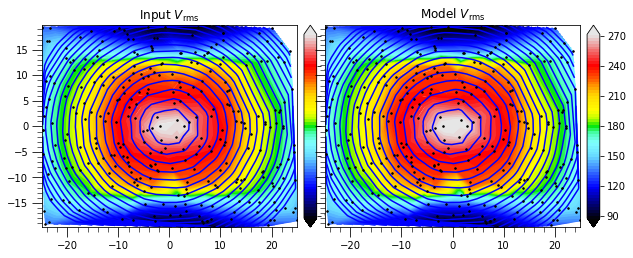

In [25]:
#Run my Jampy class
plt.figure(figsize=(10,8))
My_model, ml, chi2, chi2T = Jam_model.run(plot=True, quiet=False, cmap="sauron",nodots=False)
plt.savefig(data_folder+"Reconstruction.png", fmt="png")

The value of chi2/DOF is too small because we are using exactly the real inputs, it means that the model are equal to data, and the error are minimal.